<a href="https://colab.research.google.com/github/bart-kra/Data-Science-od-podstaw/blob/main/unit1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import Counter
from collections import defaultdict
from matplotlib import pyplot as plt

In [2]:
# CREATING LIST OF USERS
users = [{'id': 0, 'name': 'Arthur'},
         {'id': 1, 'name': 'Bob'},
         {'id': 2, 'name': 'Charlie'},
         {'id': 3, 'name': 'Daniel'},
         {'id': 4, 'name': 'Edward'},
         {'id': 5, 'name': 'Frank'},
         {'id': 6, 'name': 'Gary'},
         {'id': 7, 'name': 'Hans'},
         {'id': 8, 'name': 'Igor'},
         {'id': 9, 'name': 'John'}]

# CREATING PAIRS OF FRIENDS
friendship_pairs = [(0, 2), (0, 3), (0, 6), (0, 8), (1,2), (1, 6), (1, 8), (1, 9),
               (2, 5), (2, 8), (2, 9), (3, 4), (3, 5), (3, 7), (4, 6), (4, 8),
               (5, 9), (6, 7), (6, 8), (7, 9), (8, 9)]

# CREATING INTERESTS LIST
interests = [(0, 'Python'), (0, 'Big Data'), (0, 'SQL'), (0, 'banking'), (0, 'Data Science'),
             (1, 'Java'), (1, 'Programming'), (1, 'Jenkins'),
             (2, 'Big Data'), (2, 'java'), (3, 'Parallel computing'), (3, 'Deep Learing'),
             (4, 'R'), (4, 'Social Nets'), (3, 'Natural Language Processing'),
             (5, 'Python'), (5, 'Programming'), (5, 'Deep Learning'), (5, 'Docker'), (5, 'Data Science'), (5, 'Big data'),
             (6, 'Java'), (6, 'Jenkins'), (6, 'Parallel Computing'), (6, 'Machine learning'),
             (7, 'R'), (7, 'Social Nets'), (7, 'deep Learning'), (7, 'Docker'), (7, 'Data science'),
             (8, 'Python'), (8, 'Banking'), (8, 'SQL'), (8, 'Big Data'),
             (9, 'Python'), (9, 'programming'), (9, 'Jenkins'), (9, 'Docker')]

# CREATING SALARIES-TENURE LIST
salaries = [(1, 8000), (1, 6000), (1, 7500), (1.5, 7500), (1.5, 6000), (1.5, 9000), (2, 7000), (2, 12000), (2.5, 10500),
            (2.5, 9500), (3, 14000), (3, 12500), (3, 16000), (3.5, 12700), (3.5, 14000), (3.5, 9600),
            (4, 15000), (4, 15500), (4, 18000), (5, 20000), (5, 15000), (5, 13500), (5, 19900)]

In [3]:
# CREATING DISCTIONARY OF FRIENDS LISTS
friendships = {user['id']: [] for user in users}
for i, j in friendship_pairs:
  friendships[i].append(j)
  friendships[j].append(i)

In [4]:
# AVERAGE FRIENDS NUMBER
def number_of_friends(user):
  user_id = user['id']
  return len(friendships[user_id])

total_friendships = sum(number_of_friends(user) for user in users)
avg_number_of_friends = total_friendships / len(users)

In [5]:
# SORTING USERS ON NUMBER OF FRIENDS
sum_friends_by_id = [(user['id'], number_of_friends(user)) for user in users]
sum_friends_by_id.sort(key = lambda id_and_friends: id_and_friends[1], reverse=True)

In [6]:
# FOAF
def foaf_ids(user):
  return Counter(foaf_id
          for friend_id in friendships[user['id']]
          for foaf_id in friendships[friend_id]
          if foaf_id != user['id'] and foaf_id not in friendships[user['id']])

list((user['id'], foaf_ids(user)) for user in users)

[(0, Counter({1: 3, 5: 2, 9: 2, 4: 3, 7: 2})),
 (1, Counter({0: 3, 5: 2, 4: 2, 7: 2})),
 (2, Counter({3: 2, 6: 3, 4: 1, 7: 1})),
 (3, Counter({2: 2, 6: 3, 8: 2, 9: 2})),
 (4, Counter({0: 3, 5: 1, 7: 2, 1: 2, 2: 1, 9: 1})),
 (5, Counter({0: 2, 1: 2, 8: 2, 4: 1, 7: 2})),
 (6, Counter({2: 3, 3: 3, 9: 3})),
 (7, Counter({0: 2, 4: 2, 5: 2, 1: 2, 8: 2, 2: 1})),
 (8, Counter({3: 2, 5: 2, 7: 2})),
 (9, Counter({6: 3, 0: 2, 3: 2, 4: 1}))]

In [7]:
# SEARCHING USERS WITH PARTICULAR INTEREST
def user_likes(target_interest):
  return [user_id for user_id, interest in interests
  if interest == target_interest]
[(interest, user_likes(interest)) for interest in set(interest for id, interest in interests)]

[('R', [4, 7]),
 ('Big Data', [0, 2, 8]),
 ('Data Science', [0, 5]),
 ('Parallel computing', [3]),
 ('Deep Learing', [3]),
 ('Java', [1, 6]),
 ('Data science', [7]),
 ('SQL', [0, 8]),
 ('Jenkins', [1, 6, 9]),
 ('deep Learning', [7]),
 ('Docker', [5, 7, 9]),
 ('programming', [9]),
 ('Big data', [5]),
 ('java', [2]),
 ('Programming', [1, 5]),
 ('Parallel Computing', [6]),
 ('Banking', [8]),
 ('Social Nets', [4, 7]),
 ('banking', [0]),
 ('Python', [0, 5, 8, 9]),
 ('Deep Learning', [5]),
 ('Natural Language Processing', [3]),
 ('Machine learning', [6])]

In [8]:
# INDEXING BY INTERESTS
user_ids_by_interest = defaultdict(list)
for user_id, interest in interests:
  user_ids_by_interest[interest].append(user_id)
user_ids_by_interest

defaultdict(list,
            {'Python': [0, 5, 8, 9],
             'Big Data': [0, 2, 8],
             'SQL': [0, 8],
             'banking': [0],
             'Data Science': [0, 5],
             'Java': [1, 6],
             'Programming': [1, 5],
             'Jenkins': [1, 6, 9],
             'java': [2],
             'Parallel computing': [3],
             'Deep Learing': [3],
             'R': [4, 7],
             'Social Nets': [4, 7],
             'Natural Language Processing': [3],
             'Deep Learning': [5],
             'Docker': [5, 7, 9],
             'Big data': [5],
             'Parallel Computing': [6],
             'Machine learning': [6],
             'deep Learning': [7],
             'Data science': [7],
             'Banking': [8],
             'programming': [9]})

In [9]:
# INDEXING BY USERS
interests_by_user = defaultdict(list)
for user_id, interest in interests:
  interests_by_user[user_id].append(interest)
interests_by_user

defaultdict(list,
            {0: ['Python', 'Big Data', 'SQL', 'banking', 'Data Science'],
             1: ['Java', 'Programming', 'Jenkins'],
             2: ['Big Data', 'java'],
             3: ['Parallel computing',
              'Deep Learing',
              'Natural Language Processing'],
             4: ['R', 'Social Nets'],
             5: ['Python',
              'Programming',
              'Deep Learning',
              'Docker',
              'Data Science',
              'Big data'],
             6: ['Java', 'Jenkins', 'Parallel Computing', 'Machine learning'],
             7: ['R',
              'Social Nets',
              'deep Learning',
              'Docker',
              'Data science'],
             8: ['Python', 'Banking', 'SQL', 'Big Data'],
             9: ['Python', 'programming', 'Jenkins', 'Docker']})

In [10]:
# SELECTING USERS WITH THE MOST COMMON INTERESTS
def most_common_interests_with(user):
  return Counter(interested_user_id
                 for interest in interests_by_user[user['id']]
                 for interested_user_id in user_ids_by_interest[interest]
                 if interested_user_id != user['id'])

[(user['id'], most_common_interests_with(user)) for user in users]

[(0, Counter({5: 2, 8: 3, 9: 1, 2: 1})),
 (1, Counter({6: 2, 5: 1, 9: 1})),
 (2, Counter({0: 1, 8: 1})),
 (3, Counter()),
 (4, Counter({7: 2})),
 (5, Counter({0: 2, 8: 1, 9: 2, 1: 1, 7: 1})),
 (6, Counter({1: 2, 9: 1})),
 (7, Counter({4: 2, 5: 1, 9: 1})),
 (8, Counter({0: 3, 5: 1, 9: 1, 2: 1})),
 (9, Counter({0: 1, 5: 2, 8: 1, 1: 1, 6: 1, 7: 1}))]

Text(0.5, 1.0, 'Salary-Tenure')

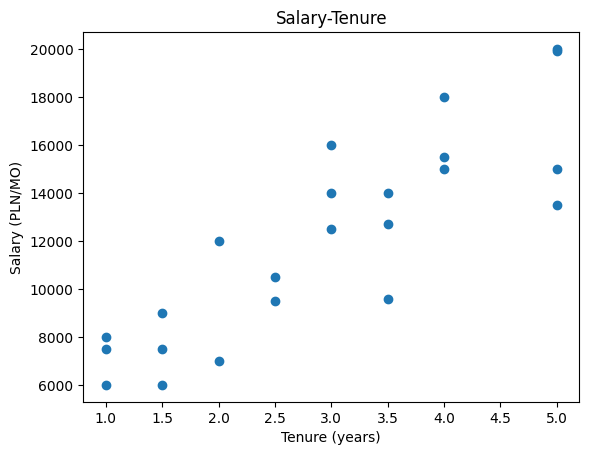

In [11]:
# CREATING SALARY-TENURE CHART
salary, tenure = zip(*salaries)
plt.scatter(salary, tenure)
plt.xlabel('Tenure (years)')
plt.ylabel('Salary (PLN/MO)')
plt.title('Salary-Tenure')

In [12]:
# AVERAGE SALARIES DEPENDED ON TENURE
def tenure_bucket(tenure):
  if tenure < 2:
    return '<2'
  elif tenure < 4:
    return '2-4'
  else:
    return '>=5'

salary_by_tenure = defaultdict(list)
for tenure, salary in salaries:
  bucket = tenure_bucket(tenure)
  salary_by_tenure[bucket].append(salary)

avg_salary_by_bucket = {tenure_bucket : sum(salary) / len(salary)
                        for tenure_bucket, salary in salary_by_tenure.items()}
avg_salary_by_bucket

{'<2': 7333.333333333333, '2-4': 11780.0, '>=5': 16700.0}

In [13]:
# FIND THE MOST COMMON INTEREST
words_and_counts = Counter(word
                           for user, interest in interests
                           for word in interest.lower().split(' '))
words_and_counts

Counter({'python': 4,
         'big': 4,
         'data': 7,
         'sql': 2,
         'banking': 2,
         'science': 3,
         'java': 3,
         'programming': 3,
         'jenkins': 3,
         'parallel': 2,
         'computing': 2,
         'deep': 3,
         'learing': 1,
         'r': 2,
         'social': 2,
         'nets': 2,
         'natural': 1,
         'language': 1,
         'processing': 1,
         'learning': 3,
         'docker': 3,
         'machine': 1})